In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [42]:
%matplotlib inline

# 1d case

In [43]:
# How many? -1 == all
resses = -1
sizes = [100, 200, 400, 800, 1600, 3200]
sizes = sizes[0:resses]

fs_ID_100 = []
fs_ID_200 = []
fs_ID_400 = []
fs_ID_800 = []
fs_ID_1600 = []
fs_ID_3200 = []

fs_IS_100 = []
fs_IS_200 = []
fs_IS_400 = []
fs_IS_800 = []
fs_IS_1600 = []
fs_IS_3200 = []

fs_ISCE_100 = []
fs_ISCE_200 = []
fs_ISCE_400 = []
fs_ISCE_800 = []
fs_ISCE_1600 = []
fs_ISCE_3200 = []

for n in range(6):
    fs_IS_100.append(h5py.File(f'IS/PureShear/Shear/res_scaling/100/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_100.append(h5py.File(f'ISCE/PureShear/Shear/scaling/100/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_100.append(h5py.File(f'IS/PureShear/Ideal/scaling/100/data_serial_TIx_{n}.hdf5', 'r'))
    
    fs_IS_200.append(h5py.File(f'IS/PureShear/Shear/res_scaling/200/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_200.append(h5py.File(f'ISCE/PureShear/Shear/scaling/200/data_serial_TIx_{n}.hdf5', 'r'))  
    fs_ID_200.append(h5py.File(f'IS/PureShear/Ideal/scaling/200/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_400.append(h5py.File(f'IS/PureShear/Shear/res_scaling/400/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_400.append(h5py.File(f'ISCE/PureShear/Shear/scaling/400/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_400.append(h5py.File(f'IS/PureShear/Ideal/scaling/400/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_800.append(h5py.File(f'IS/PureShear/Shear/res_scaling/800/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_800.append(h5py.File(f'ISCE/PureShear/Shear/scaling/800/data_serial_TIx_{n}.hdf5', 'r'))    
    fs_ID_800.append(h5py.File(f'IS/PureShear/Ideal/scaling/800/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_1600.append(h5py.File(f'IS/PureShear/Shear/res_scaling/1600/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_1600.append(h5py.File(f'ISCE/PureShear/Shear/scaling/1600/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_1600.append(h5py.File(f'IS/PureShear/Ideal/scaling/1600/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_3200.append(h5py.File(f'IS/PureShear/Shear/res_scaling/3200/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_3200.append(h5py.File(f'ISCE/PureShear/Shear/scaling/3200/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_3200.append(h5py.File(f'IS/PureShear/Ideal/scaling/3200/data_serial_TIx_{n}.hdf5', 'r'))
    
# for p in range(len(fss_IS)-1):
#     for n in range(6):
#         fss_IS[p+1] = h5py.File(f'IS/PureShear/Shear/scaling/'+str(100*2**p)+f'/data_serial_TIx_{n}.hdf5', 'r')
#         fss_ISCE[p+1] = h5py.File(f'ISCE/PureShear/Shear/scaling/'+str(100*2**p)+f'/data_serial_TIx_{n}.hdf5', 'r')
   
fss_IS = [fs_IS_100, fs_IS_200, fs_IS_400, fs_IS_800, fs_IS_1600, fs_IS_3200]
fss_IS = fss_IS[0:resses]

fss_ISCE = [fs_ISCE_100, fs_ISCE_200, fs_ISCE_400, fs_ISCE_800, fs_ISCE_1600, fs_ISCE_3200]
fss_ISCE = fss_ISCE[0:resses]

fss_ID = [fs_ID_100, fs_ID_200, fs_ID_400, fs_ID_800, fs_ID_1600, fs_ID_3200]
fss_ID = fss_ID[0:resses]

fss = [fss_IS, fss_ISCE]#, fss_ISCE]

In [44]:
fss[1][0]

[<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>]

In [45]:
fssIS, fssISCE = fss[0], fss[1]
for fsIS, fsISCE in zip(fssIS, fssISCE):
    print(fsIS[0]['Primitive/pi11'].shape)
    print(fsISCE[0]['Primitive/p'].shape)

(100,)
(100,)
(200,)
(200,)
(400,)
(400,)
(800,)
(800,)
(1600,)
(1600,)


In [46]:
# eta = fs_IS[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_IS[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_IS[0]['Domain'].attrs['dt'][0]}")

In [47]:
# eta = fs_ISCE[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_ISCE[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_ISCE[0]['Domain'].attrs['dt'][0]}")

In [48]:
print("IS: \n")
for fs in fss[0]:
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
          f"relaxation time {tau_pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

print("ISCE: \n")
for fs in fss[1]:
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
          f"relaxation time {tau_pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

IS: 

Dissipation strength 0.01, relaxation time 0.1, timestep 0.002
Dissipation strength 0.01, relaxation time 0.1, timestep 0.001
Dissipation strength 0.01, relaxation time 0.1, timestep 0.0005
Dissipation strength 0.01, relaxation time 0.1, timestep 0.00025
Dissipation strength 0.01, relaxation time 0.1, timestep 0.000125
ISCE: 

Dissipation strength 0.01, relaxation time 0.1, timestep 0.002
Dissipation strength 0.01, relaxation time 0.1, timestep 0.001
Dissipation strength 0.01, relaxation time 0.1, timestep 0.0005
Dissipation strength 0.01, relaxation time 0.1, timestep 0.00025
Dissipation strength 0.01, relaxation time 0.1, timestep 0.000125


In [49]:
for fs in fss[0]:
    print(fs[-1].attrs['t'])
for fs in fss[1]:
    print(fs[-1].attrs['t'])

[6.]
[6.]
[6.]
[6.]
[6.]
[6.]
[6.]
[6.]
[6.]
[6.]


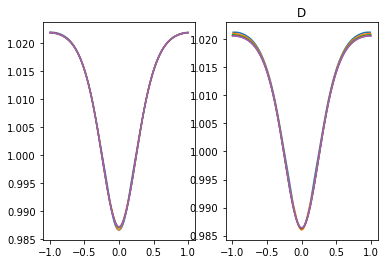

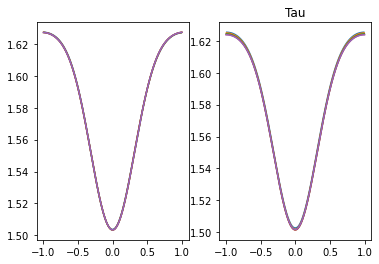

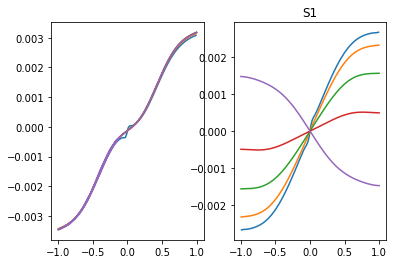

In [50]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
  
for quant in['D','Tau','S1']:
    fig, axes = plt.subplots(1,2)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[-1]['Domain/x'], fs[-1]['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
            plt.title(quant)
        #plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


In [51]:
# for quant in['D','Tau','S1']:
#     plt.figure()
#     for n in range(len(fs_IS)):
#         #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs_IS[n]['Domain/x'], (fs_IS[n]['Conserved/'+quant][:] - fs_ISCE[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.title(quant)
#     plt.legend()
#     plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
#     plt.show()

INITIAL DATA


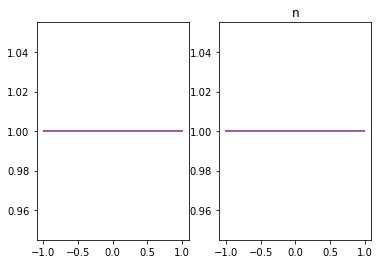

<Figure size 432x288 with 0 Axes>

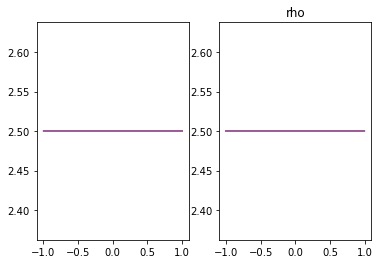

<Figure size 432x288 with 0 Axes>

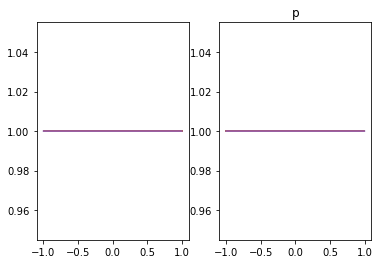

<Figure size 432x288 with 0 Axes>

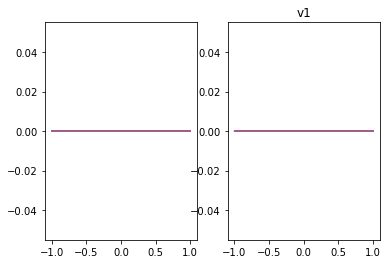

<Figure size 432x288 with 0 Axes>

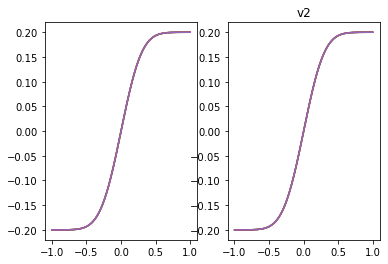

<Figure size 432x288 with 0 Axes>

In [52]:
print("INITIAL DATA")
for quant in['n','rho','p','v1','v2']:
    fig, axes = plt.subplots(1,2)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[0]['Domain/x'], fs[0]['Primitive/'+quant][:])#=rf"$t=${f.attrs['t'][0]:.2e}")
            plt.title(quant)
    #plt.legend()
    plt.show()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


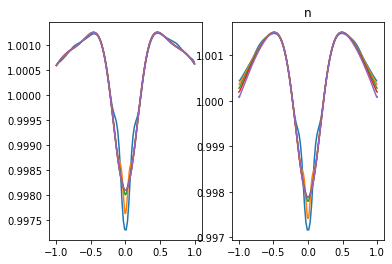

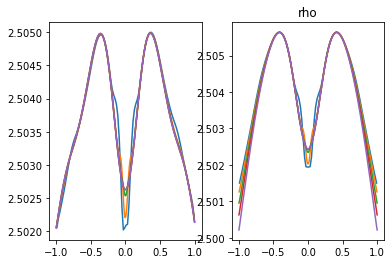

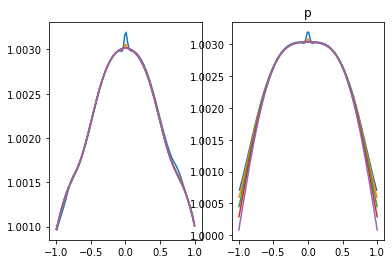

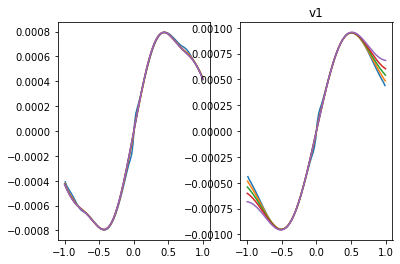

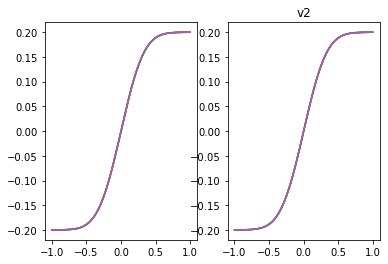

In [53]:
for quant in['n','rho','p','v1','v2']:
    fig, axes = plt.subplots(1,2)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[-1]['Domain/x'], fs[1]['Primitive/'+quant][:])
        plt.title(quant)
    #plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


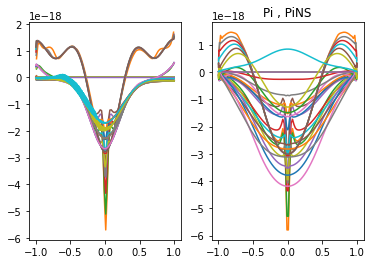

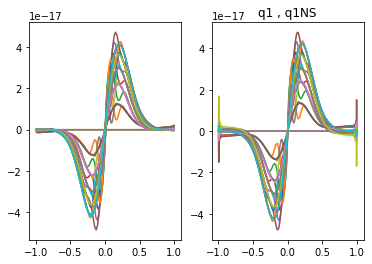

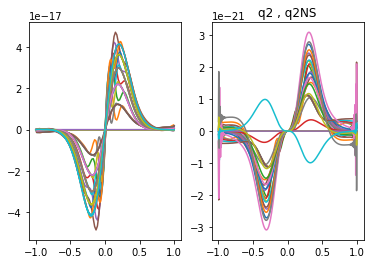

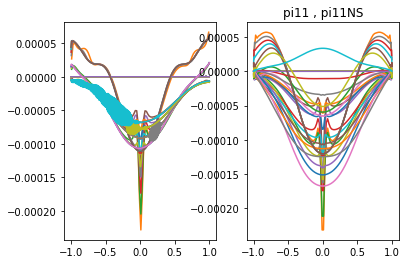

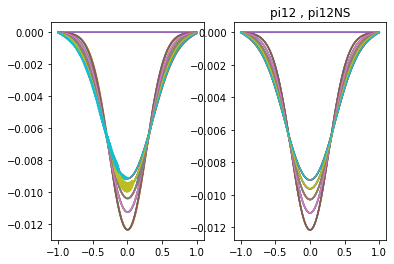

In [54]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    fig, axes = plt.subplots(1,2)
    axis = axes[0]
    for fsIS in fss_IS:
        for fIS in fsIS:
            axis.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    axis = axes[1]
    for fsISCE in fss_ISCE:
        for fISCE in fsISCE:
            axis.plot(fISCE['Domain/x'], fISCE['Auxiliary/'+quant+'NS'][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' , '+quant+'NS')
    #plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

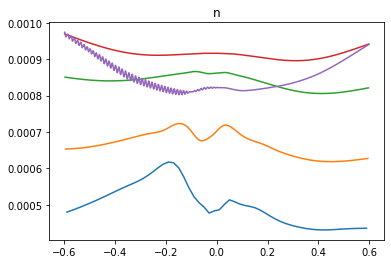

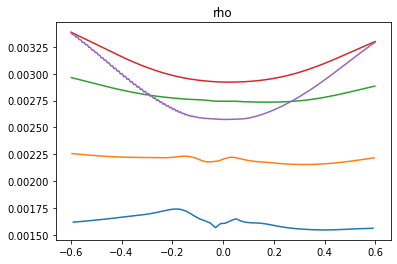

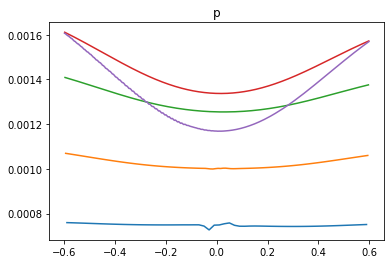

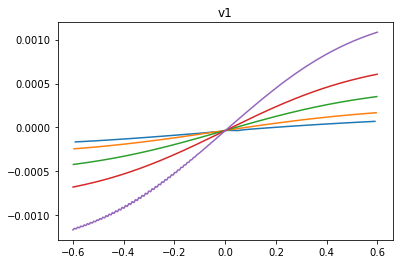

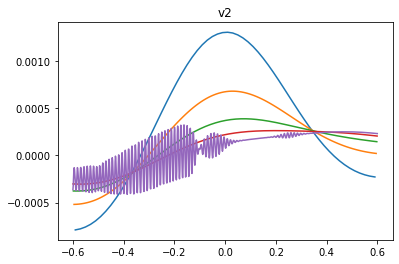

In [59]:
lims = [0.2,0.8]
plt.figure()
for quant in['n','rho','p','v1','v2']:
    for fsIS, fsISCE in zip(fss_IS, fss_ISCE):
        nsl = int(lims[0]*fsIS[0]['Primitive/pi11'].shape[0])
        nsu = int(lims[1]*fsIS[0]['Primitive/pi11'].shape[0])
        plt.plot(fsIS[0]['Domain/x'][nsl:nsu], fsIS[-1]['Primitive/'+quant][nsl:nsu] - fsISCE[-1]['Primitive/'+quant][nsl:nsu])
        #plt.plot(fsIS[0]['Domain/x'], fsIS[1]['Primitive/'+quant][:] - fsISCE[1]['Primitive/'+quant][:])
        plt.title(quant)
    plt.savefig("ComparePlots/DiffAcrossDomain_"+quant+".pdf")
    plt.show()
    

In [56]:
a = [3,4,5]
b = [3,4,5,3,4,5]
print(np.linalg.norm(a,np.inf))
print(np.linalg.norm(b,np.inf))

5.0
5.0


2.106707068239997e-07 0.0006993142987628269


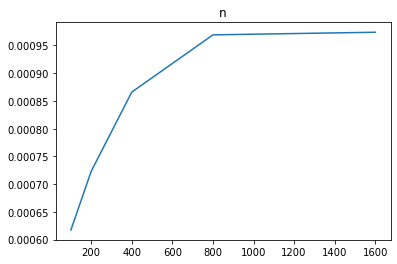

9.54720654189281e-07 0.0021546059819496652


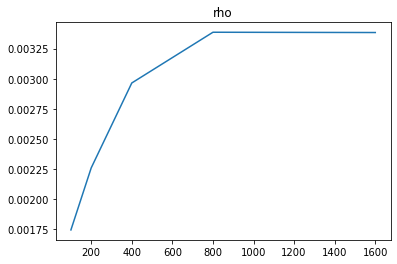

4.777223163663853e-07 0.0009950109819611053


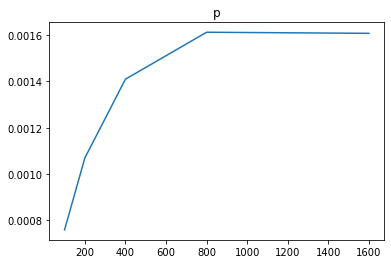

6.61548635966218e-07 0.00012450165331464338


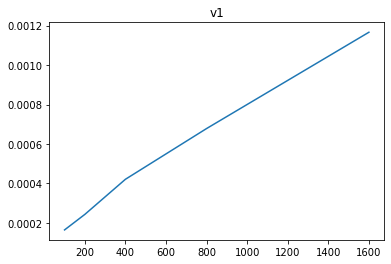

-3.97880143755836e-07 0.00086570422500233


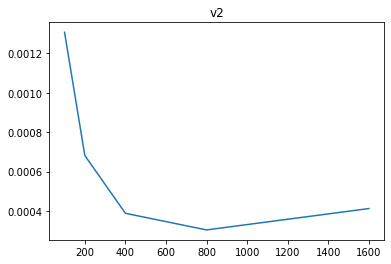

In [60]:
diffs = []
plt.figure()
for quant in['n','rho','p','v1','v2']:
    for fsIS, fsISCE, size in zip(fss_IS, fss_ISCE, sizes):
        nslice_lower = int(lims[0]*fsIS[0]['Primitive/pi11'].shape[0])
        nslice_upper = int(lims[1]*fsIS[0]['Primitive/pi11'].shape[0])
#         diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
#                                    - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),1)/size))
#         diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
#                                    - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),2)/np.sqrt(size)))
        diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
                                   - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),np.inf)))
    plt.plot(sizes, diffs)
    slope, intercept = np.polyfit(sizes, diffs, 1)
    print(slope, intercept)
    #plt.plot(sizes, intercept + slope*np.array(sizes))
    #plt.plot(sizes, diffs)
    plt.title(quant)
    plt.savefig("ComparePlots/DiffScaling_"+quant+".pdf")
    plt.show()
    diffs.clear()

# for quant in['n','rho','p','v1','v2']:
#     for fsIS, fsISCE, size in zip(fss_IS, fss_ISCE, sizes):
#         print(size, np.sum(np.abs(fsIS[-1]['Primitive/'+quant][:] - fsISCE[-1]['Primitive/'+quant][:])))
#         plt.plot(size, np.sum(np.abs(fsIS[-1]['Primitive/'+quant][:] - fsISCE[-1]['Primitive/'+quant][:])))
#     plt.title(quant)
#     plt.show()
#     #plt.legend()
#     plt.savefig("ComparePlots/Prims_"+quant+".pdf")

In [58]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

NameError: name 'fs_IS' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

In [ ]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
